In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from CSV
data = pd.read_csv("colorado_weather_data.csv")

print("Number of rows and columns in the data:", data.shape)
print("\nColumn datatype are:\n",data.dtypes)

Number of rows and columns in the data: (600, 13)

Column datatype are:
 City                      object
Date & Time               object
Temperature              float64
Temp Min                 float64
Temp Max                 float64
Humidity                   int64
Pressure                   int64
Wind Speed               float64
Visibility               float64
Cloud Coverage             int64
Weather Description       object
Rain Volume (last 3h)     object
Snow Volume (last 3h)     object
dtype: object


In [93]:
# 1. Print unique values in "Rain Volume (last 3h)" and "Snow Volume (last 3h)"
print("Unique values in 'Rain Volume (last 3h)':")
print(data["Rain Volume (last 3h)"].unique())

print("\nUnique values in 'Snow Volume (last 3h)':")
print(data["Snow Volume (last 3h)"].unique())

Unique values in 'Rain Volume (last 3h)':
['No rain' '0.33' '0.21' '0.12' '0.11']

Unique values in 'Snow Volume (last 3h)':
['No snow' '0.54' '1.98' '3.62' '2.38' '0.35' '0.38' '4.12' '4.1' '2.14'
 '0.81' '3.66' '7.43' '4.49' '0.88' '0.51' '0.22' '3.39' '5.01' '5.92'
 '4.27' '3.28' '1.21' '1.29' '1.46' '2.87' '1.64' '0.18' '0.98' '1.59'
 '1.5' '0.23' '0.72' '1.05' '0.12' '0.94' '1.44' '1.35' '0.2' '3.94'
 '9.46' '4.88']


In [95]:
# 2. Add cleaned columns for "Rain Volume (last 3h)" and "Snow Volume (last 3h)"
data["Rain Volume (last 3h) cleaned"] = data["Rain Volume (last 3h)"].apply(lambda x: "Rain" if x != "No rain" else "No rain")
data["Snow Volume (last 3h) cleaned"] = data["Snow Volume (last 3h)"].apply(lambda x: "Snow" if x != "No snow" else "No snow")

data.head()

,City,Date & Time,Temperature,Temp Min,Temp Max,Humidity,Pressure,Wind Speed,Visibility,Cloud Coverage,Weather Description,Rain Volume (last 3h),Snow Volume (last 3h),Rain Volume (last 3h) cleaned,Snow Volume (last 3h) cleaned
0,Boulder,1/27/2025 0:00,-7.30,-8.52,-7.30,79,1027,2.50,10000.0,90,Overcast clouds,No rain,No snow,No rain,No snow
1,Boulder,1/27/2025 3:00,-8.35,-9.18,-8.35,79,1029,3.91,10000.0,43,Scattered clouds,No rain,No snow,No rain,No snow
2,Boulder,1/27/2025 6:00,-8.06,-8.06,-8.06,78,1029,4.66,10000.0,11,Few clouds,No rain,No snow,No rain,No snow
3,Boulder,1/27/2025 9:00,-7.21,-7.21,-7.21,74,1028,5.12,10000.0,4,Clear sky,No rain,No snow,No rain,No snow
4,Boulder,1/27/2025 12:00,-6.62,-6.62,-6.62,70,1026,6.09,10000.0,4,Clear sky,No rain,No snow,No rain,No snow


In [96]:
# 3. Check for null values in the dataset
print("\nNull values in each column before filling:")
print(data.isnull().sum())


Null values in each column before filling:
City                             0
Date & Time                      0
Temperature                      0
Temp Min                         0
Temp Max                         0
Humidity                         0
Pressure                         0
Wind Speed                       0
Visibility                       5
Cloud Coverage                   0
Weather Description              0
Rain Volume (last 3h)            0
Snow Volume (last 3h)            0
Rain Volume (last 3h) cleaned    0
Snow Volume (last 3h) cleaned    0
dtype: int64


In [97]:
# 4. Fill null values: Fill with the mean
data["Visibility"].fillna(data["Visibility"].mean(), inplace=True)

# Print null values after filling
print("\nNull values in each column after filling:")
print(data.isnull().sum())


Null values in each column after filling:
City                             0
Date & Time                      0
Temperature                      0
Temp Min                         0
Temp Max                         0
Humidity                         0
Pressure                         0
Wind Speed                       0
Visibility                       0
Cloud Coverage                   0
Weather Description              0
Rain Volume (last 3h)            0
Snow Volume (last 3h)            0
Rain Volume (last 3h) cleaned    0
Snow Volume (last 3h) cleaned    0
dtype: int64


In [98]:
# 5. Print statistics for numeric columns
# print("\nStatistics for numeric columns:")
# print(data.describe())

In [75]:
# 6. Convert 'Date & Time' to datetime
data['Date & Time'] = pd.to_datetime(data['Date & Time'])

# Extract mm-dd and time
data['Month-Day'] = data['Date & Time'].dt.strftime('%m-%d')
data['Time'] = data['Date & Time'].dt.strftime('%H:%M')

data.head()

,City,Date & Time,Temperature,Temp Min,Temp Max,Humidity,Pressure,Wind Speed,Visibility,Cloud Coverage,Weather Description,Rain Volume (last 3h),Snow Volume (last 3h),Rain Volume (last 3h) cleaned,Snow Volume (last 3h) cleaned,Month-Day,Time
0,Boulder,2025-01-27 00:00:00,-7.30,-8.52,-7.30,79,1027,2.50,10000.0,90,Overcast clouds,No rain,No snow,0.0,0.0,01-27,00:00
1,Boulder,2025-01-27 03:00:00,-8.35,-9.18,-8.35,79,1029,3.91,10000.0,43,Scattered clouds,No rain,No snow,0.0,0.0,01-27,03:00
2,Boulder,2025-01-27 06:00:00,-8.06,-8.06,-8.06,78,1029,4.66,10000.0,11,Few clouds,No rain,No snow,0.0,0.0,01-27,06:00
3,Boulder,2025-01-27 09:00:00,-7.21,-7.21,-7.21,74,1028,5.12,10000.0,4,Clear sky,No rain,No snow,0.0,0.0,01-27,09:00
4,Boulder,2025-01-27 12:00:00,-6.62,-6.62,-6.62,70,1026,6.09,10000.0,4,Clear sky,No rain,No snow,0.0,0.0,01-27,12:00


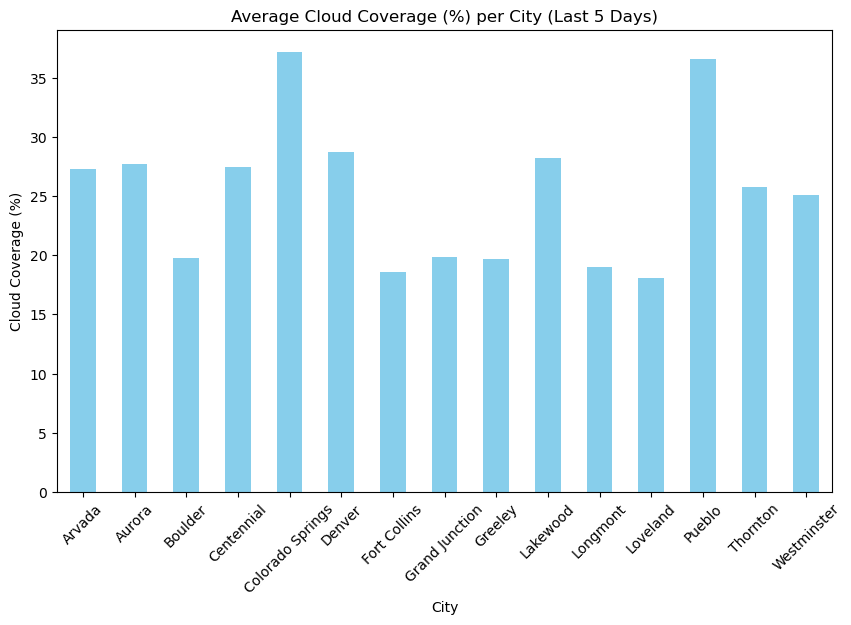

In [90]:
data['Date & Time'] = pd.to_datetime(data['Date & Time'])
data['Day'] = data['Date & Time'].dt.date

# Data Visualization
# 1. Average Cloud Coverage Bar Plot for 5 Days per City
avg_temp_per_city = data.groupby('City')['Cloud Coverage'].mean()

plt.figure(figsize=(10, 6))
avg_temp_per_city.plot(kind='bar', color='skyblue')
plt.title('Average Cloud Coverage (%) per City (Last 5 Days)')
plt.ylabel('Cloud Coverage (%)')
plt.xticks(rotation=45)
plt.show()

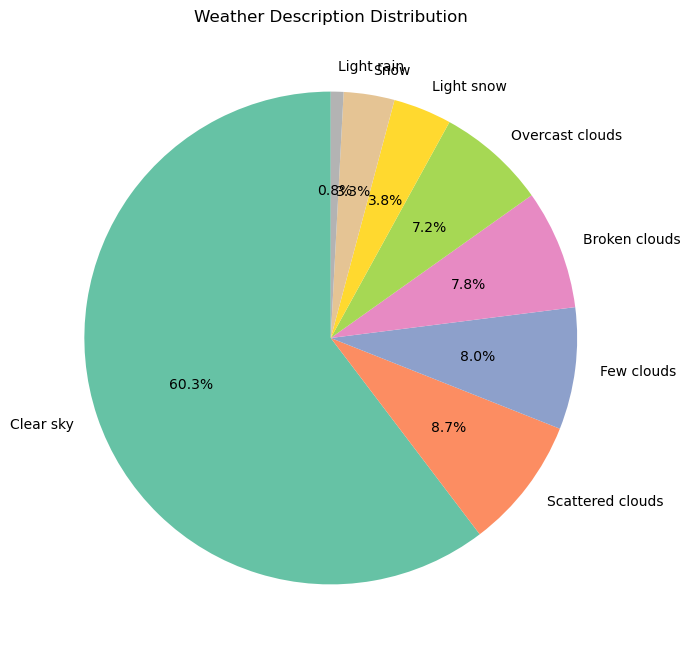

In [105]:
# 2. Weather Description Pie Chart
weather_counts = data['Weather Description'].value_counts()
plt.figure(figsize=(8, 8))
weather_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(weather_counts)))
plt.title('Weather Description Distribution')
plt.ylabel('')
plt.show()

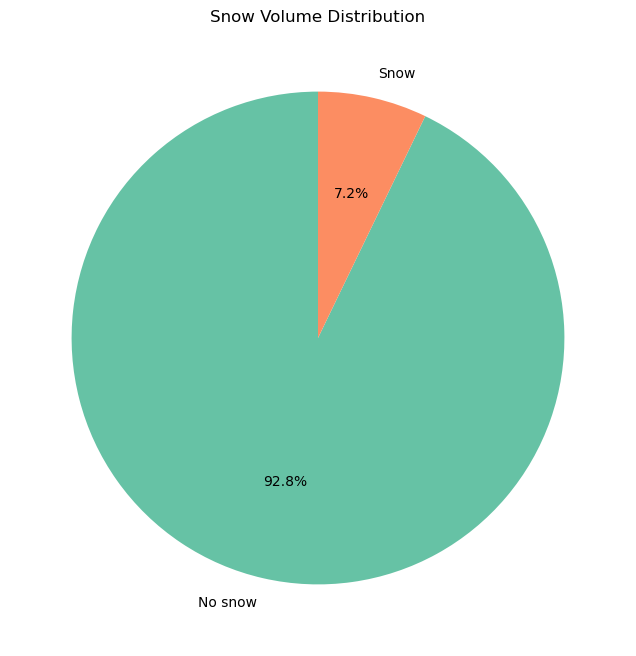

In [104]:
# 3. Snow volume Pie Chart
weather_counts = data['Snow Volume (last 3h) cleaned'].value_counts()
plt.figure(figsize=(8, 8))
weather_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(weather_counts)))
plt.title('Snow Volume Distribution')
plt.ylabel('')
plt.show()

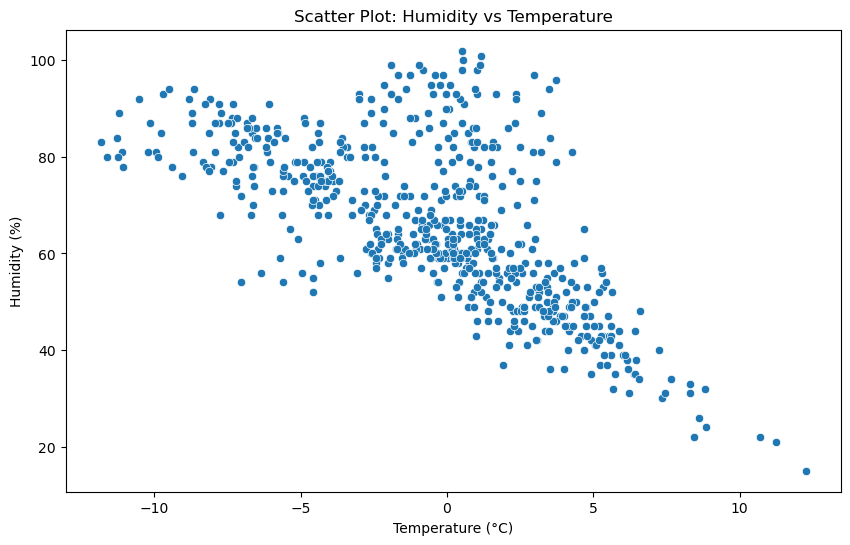

In [58]:
# 4. Scatter Plot of Humidity vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature', y='Humidity')
plt.title('Scatter Plot: Humidity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

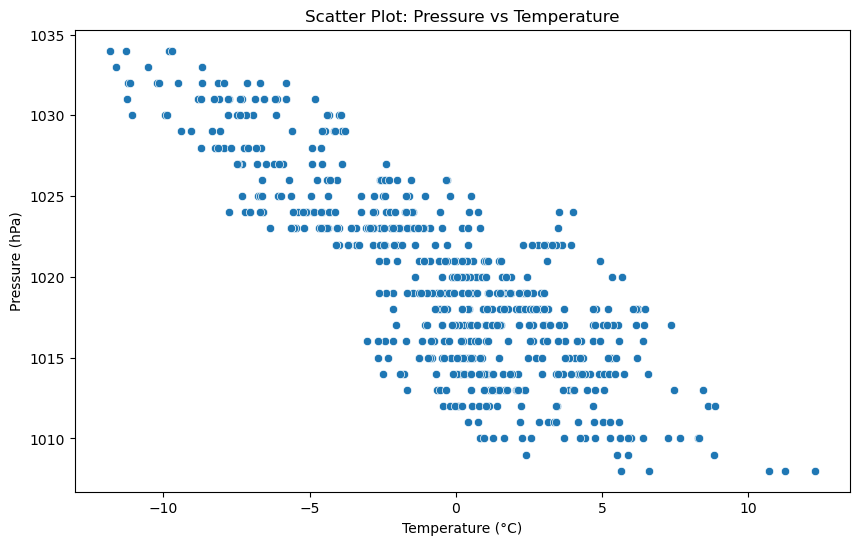

In [59]:
# 5. Scatter Plot of Pressure vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature', y='Pressure')
plt.title('Scatter Plot: Pressure vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (hPa)')
plt.show()

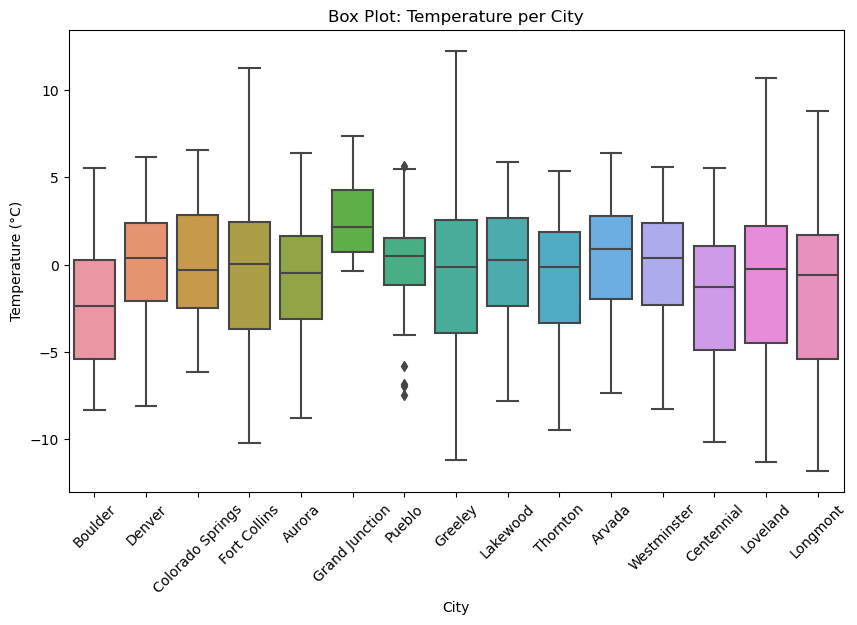

In [66]:
# 6. Box Plot of Temperature by City
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='City', y='Temperature')
plt.title('Box Plot: Temperature per City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

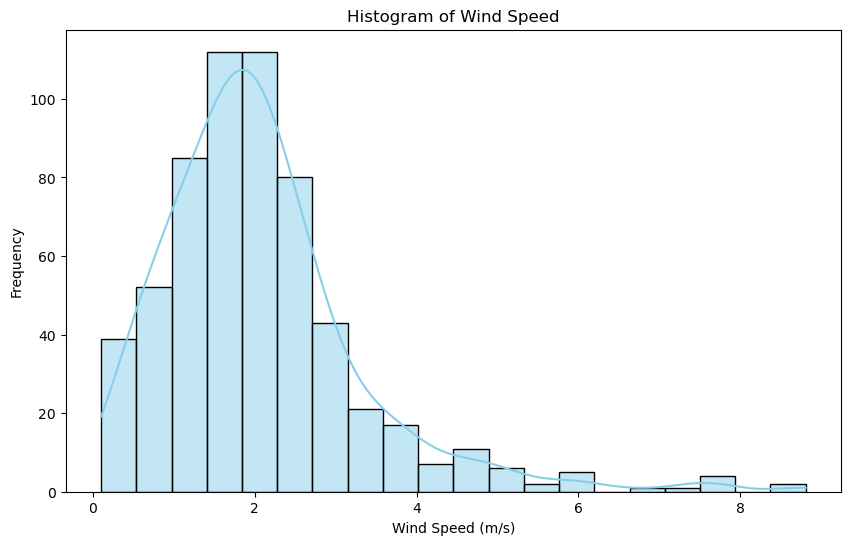

In [61]:
# 7. Histogram of Wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(data['Wind Speed'], kde=True, color='skyblue', bins=20)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

C:\Users\uttar\AppData\Local\Temp\ipykernel_31940\3953922314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


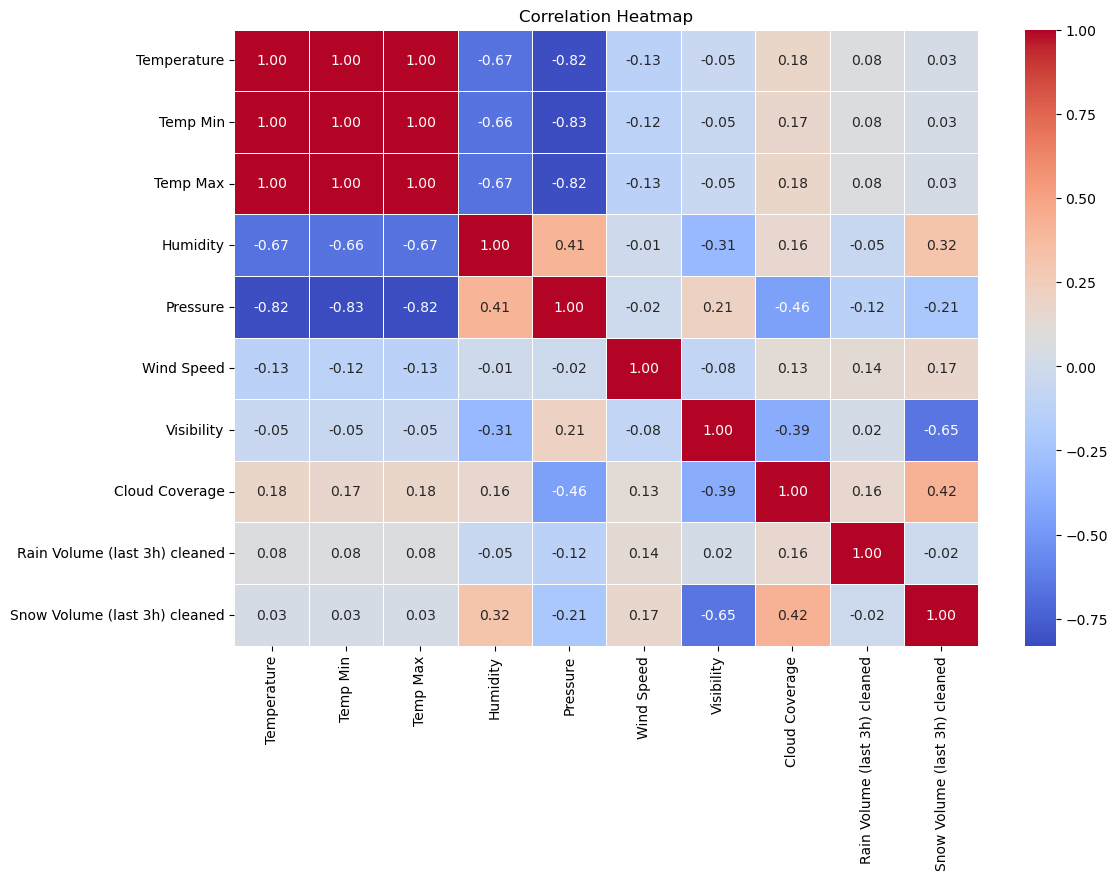

In [67]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# 8. Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

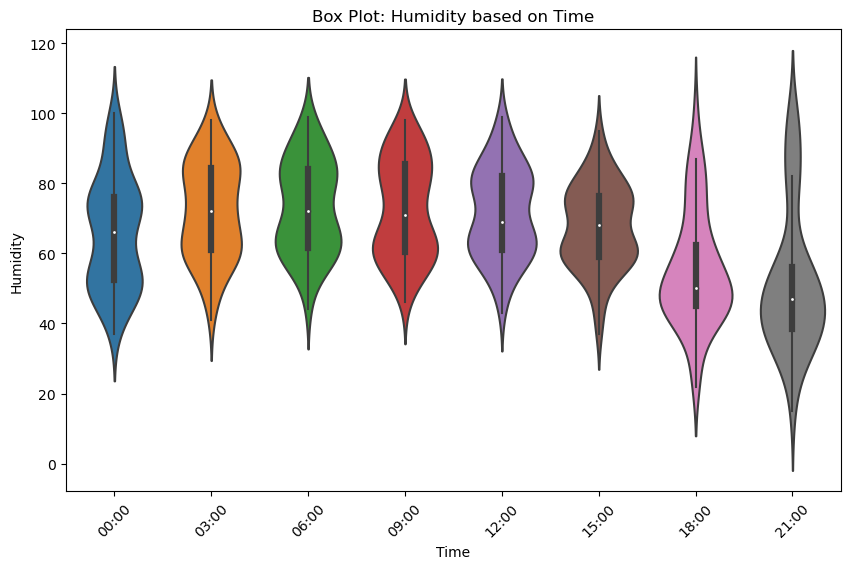

In [89]:
# 9. Humidity based on time
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Time', y='Humidity')
plt.title('Box Plot: Humidity based on Time')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.show()

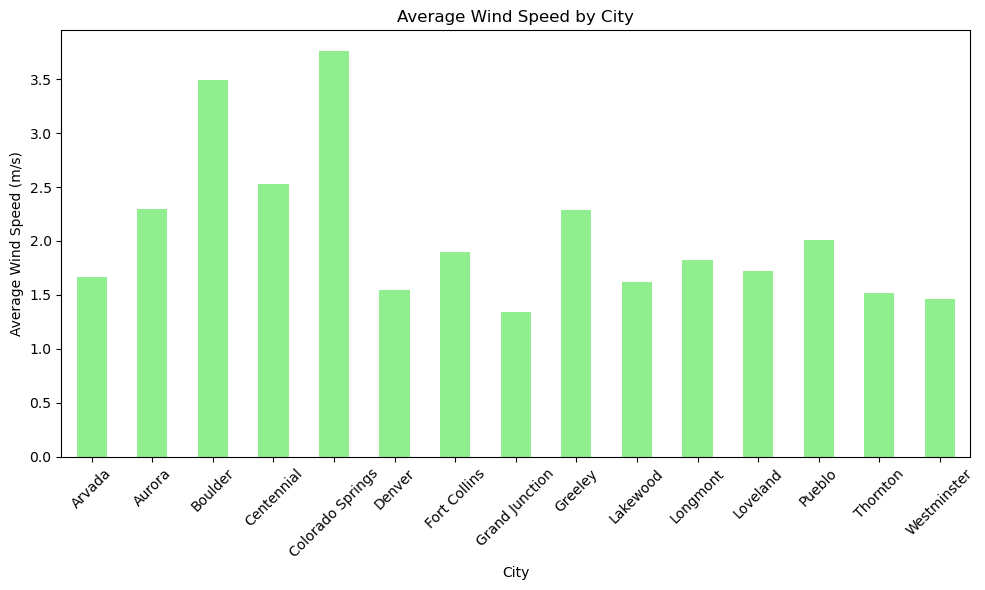

In [100]:
# Average wind speed based on day (mm-dd)
avg_wind_speed_day = data.groupby('City')['Wind Speed'].mean()


# 10. Average wind speed by day
plt.figure(figsize=(10, 6))
avg_wind_speed_day.plot(kind='bar', color='lightgreen')
plt.title('Average Wind Speed by City')
plt.xlabel('City')
plt.ylabel('Average Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.tight_layout()